In [ ]:
!pip install ultralytics

### Imports

In [25]:
import numpy as np
import matplotlib as plt
import torch 
import cv2, random, os
import torch.nn as nn
from torchvision import models, datasets, transforms
from torchvision.datasets import GTSRB
from torch.utils.data import random_split
import pandas as pd
from torch.utils.data import DataLoader
import torch.optim as optim


### Loading Data

In [30]:
data_dir = "/kaggle/input/vehicledetection/VehiclesDetectionDataset"
train_dir = os.path.join(data_dir, "Train")
test_dir = os.path.join(data_dir, "Test/images")
valid_dir = os.path.join(data_dir, "Train")
yaml_dir = "/kaggle/input/vehicledetection/VehiclesDetectionDataset/dataset.yaml"

### Training YOLO on the vehicles dataset

In [7]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")

train_results = model.train(
    data=yaml_dir,  
    epochs=10,  
    imgsz=640,  
    device="cpu", 
)

Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon CPU @ 2.00GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/vehicledetection/VehiclesDetectionDataset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        250        454      0.638      0.554      0.559      0.414
             Ambulance         50         64      0.827      0.781      0.818      0.674
                   Bus         30         46      0.701      0.652      0.676      0.546
                   Car         90        238      0.526      0.523      0.498      0.338
            Motorcycle         42         46      0.723      0.348      0.473      0.269
                 Truck         38         60      0.411      0.467      0.332      0.243
Speed: 1.4ms preprocess, 281.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /kaggle/working/runs/detect/train2


### Evaluate the model's performance on the validation set


In [8]:
metrics = model.val()

Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 1.9±0.7 ms, read: 38.8±13.1 MB/s, size: 29.4 KB)
val: Scanning /kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 250/250 658.7it/s 0.4s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/vehicledetection/VehiclesDetectionDataset/valid is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 4.3s/it 1:094.4s2s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        250        454      0.638      0.554      0.559      0.414
             Ambulance         50         64      0.827      0.781      0.818      0.674
                   Bus         30         46      0.701      0.652      0.676      0.546
                   Car         90        238      0.526      0.523      0.498      0.338
            Motorcycle         42         46      0.723      0.348      0.473      0.269
                 Truck         38         60      0.411      0.467      0.332      0.243
Speed: 1.0ms preprocess, 267.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /kaggle/working/runs/detect/val


In [20]:
results = model.val(
    data=yaml_dir,
    split='test',     # evaluate on test split
    imgsz=640,
    conf=0.25
)

# Print metrics summary
print("Precision:", results.box.map50)
print("mAP@50:", results.box.map50)
print("mAP@50-95:", results.box.map)

Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon CPU @ 2.00GHz)
val: Fast image access ✅ (ping: 1.7±1.4 ms, read: 55.2±16.0 MB/s, size: 35.4 KB)
val: Scanning /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/labels... 126 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 126/126 613.1it/s 0.2s0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/vehicledetection/VehiclesDetectionDataset/test is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 4.3s/it 34.5s4.7ss


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        126        258      0.822      0.654      0.769      0.609
             Ambulance         18         18        0.9          1      0.995      0.944
                   Bus         22         38      0.923      0.632      0.797      0.677
                   Car         60        150      0.701      0.627      0.703      0.499
            Motorcycle         12         32          1      0.312      0.656      0.352
                 Truck         14         20      0.583        0.7      0.692      0.573
Speed: 1.1ms preprocess, 265.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /kaggle/working/runs/detect/val5
Precision: 0.7687433816192597
mAP@50: 0.7687433816192597
mAP@50-95: 0.6091251543094506


### Perform object detection on an image

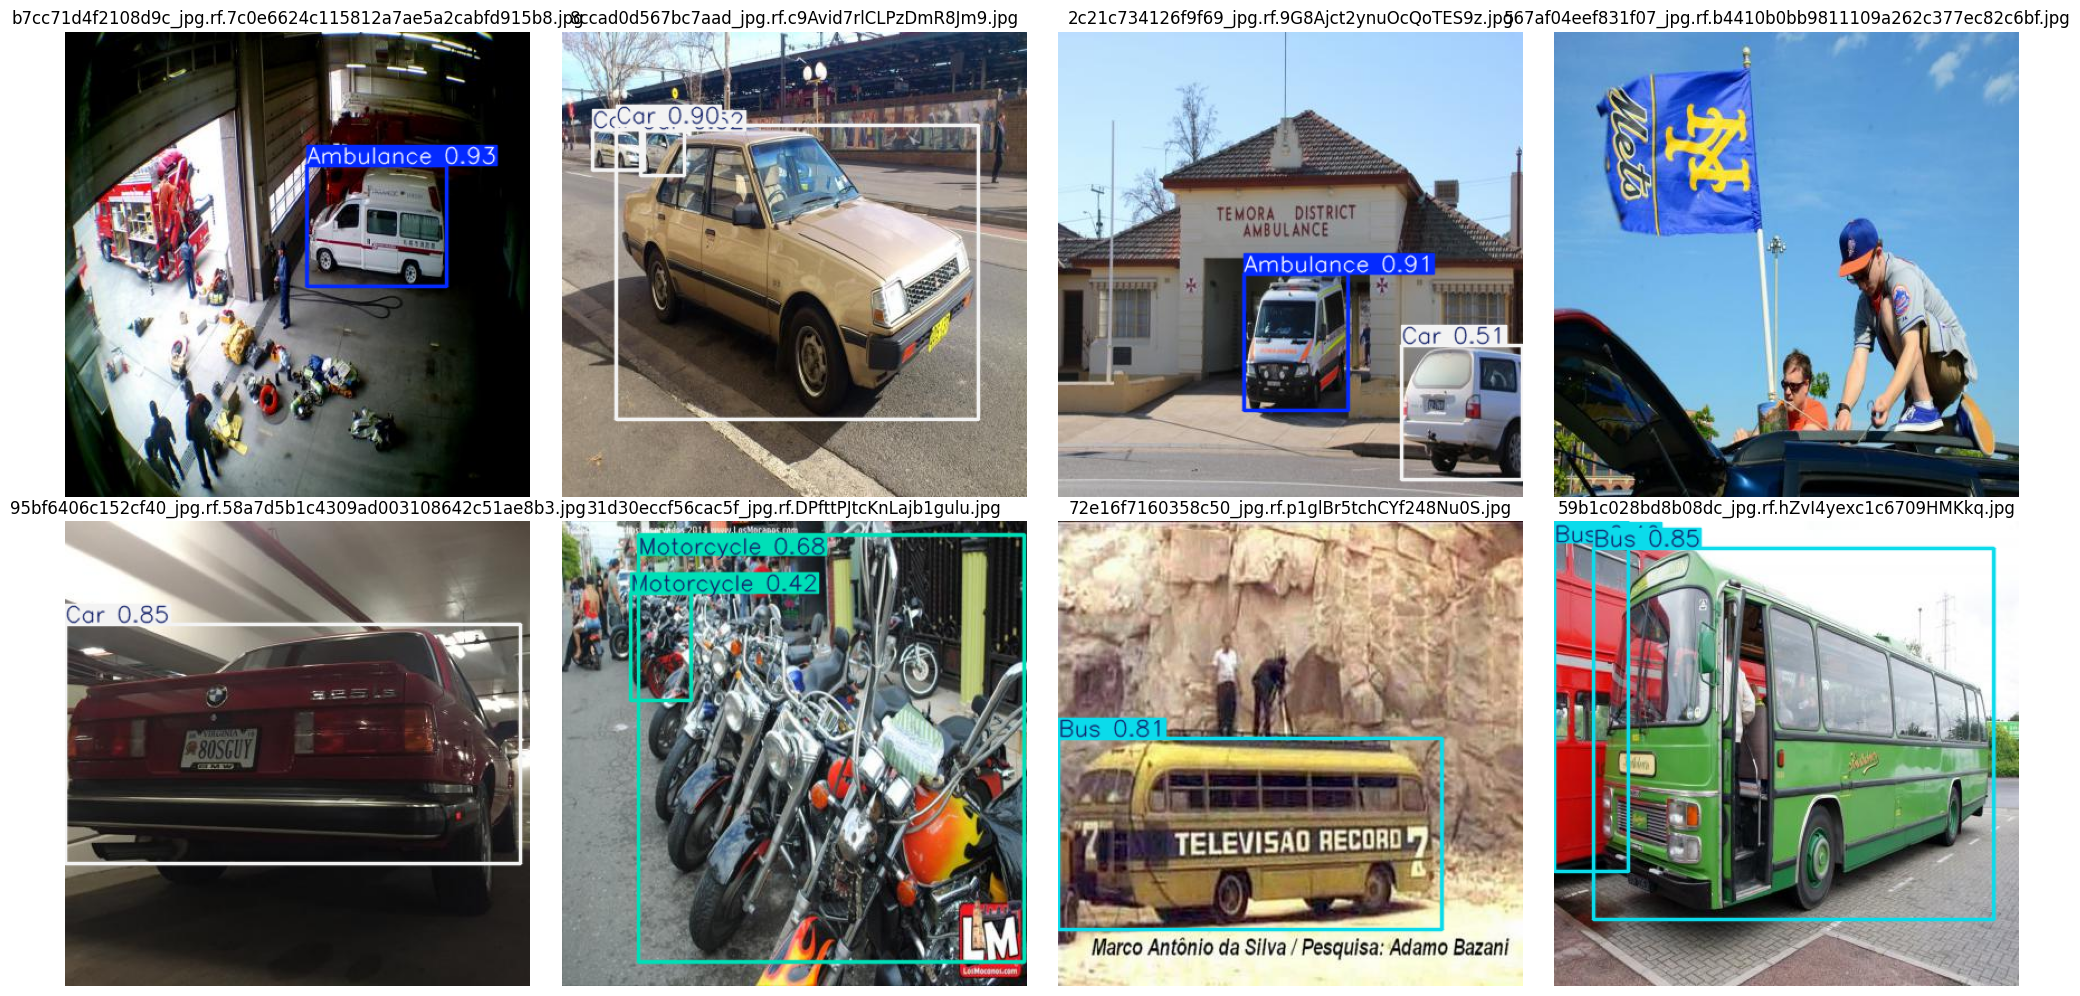

In [34]:
import matplotlib.pyplot as plt
import cv2, random, os

# Path to test images
test_path = "/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images"

image_files = [f for f in os.listdir(test_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
sample_imgs = random.sample(image_files, 8)

plt.figure(figsize=(20, 10))

for i, f in enumerate(sample_imgs):
    img_path = os.path.join(test_path, f)
    results = model.predict(source=img_path, conf=0.25, verbose=False)
    pred_img = results[0].plot()
    pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 4, i + 1)
    plt.imshow(pred_img)
    plt.title(f)
    plt.axis("off")

plt.tight_layout()
plt.show()
